# 🔍 6.2 Exploring relationships: EIA analysis project

### Collaborators: 

*   Amy Zhang (instance 332)
*   ChatGPT (instance 0101)
*   Perplexity (instance 20250331)
*   Gemini (instance 20250331)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [38]:
# Path to your csv file
csv_file_path = '/Users/amyzhang/Desktop/A6_Dashboard/01 Data/analysis_ready/filtered_agg_df.csv'

# Import 
agg_table_df = pd.read_csv(csv_file_path)  

# Verify the import
print(agg_table_df.shape)
print(agg_table_df.columns)

(25497, 56)
Index(['YEAR', 'Reported\nFuel Type Code', 'Fuel Type Full Name',
       'Reported\nPrime Mover', 'Prime Mover Full Name', 'Plant State',
       'NERC Region', 'NERC Region Full Name', 'NAICS Code', 'NAICS Full Name',
       'EIA Sector Number', 'Sector Name', 'Physical\nUnit Label',
       'Count of Plant Id', 'Sum of Conflicting Operator Id Flag',
       'Sum of Net Generation\n(Megawatthours)',
       'Sum of Elec Fuel Consumption\nMMBtu',
       'Sum of Total Fuel Consumption\nMMBtu',
       'Sum of Electric Fuel Consumption\nQuantity',
       'Sum of Total Fuel Consumption\nQuantity', 'Sum of Tot_MMBtu\nJanuary',
       'Sum of Tot_MMBtu\nFebruary', 'Sum of Tot_MMBtu\nMarch',
       'Sum of Tot_MMBtu\nApril', 'Sum of Tot_MMBtu\nMay',
       'Sum of Tot_MMBtu\nJune', 'Sum of Tot_MMBtu\nJuly',
       'Sum of Tot_MMBtu\nAugust', 'Sum of Tot_MMBtu\nSeptember',
       'Sum of Tot_MMBtu\nOctober', 'Sum of Tot_MMBtu\nNovember',
       'Sum of Tot_MMBtu\nDecember', 'Sum of Ele

# 3. Correlation Matrices

## a) All numerical columns

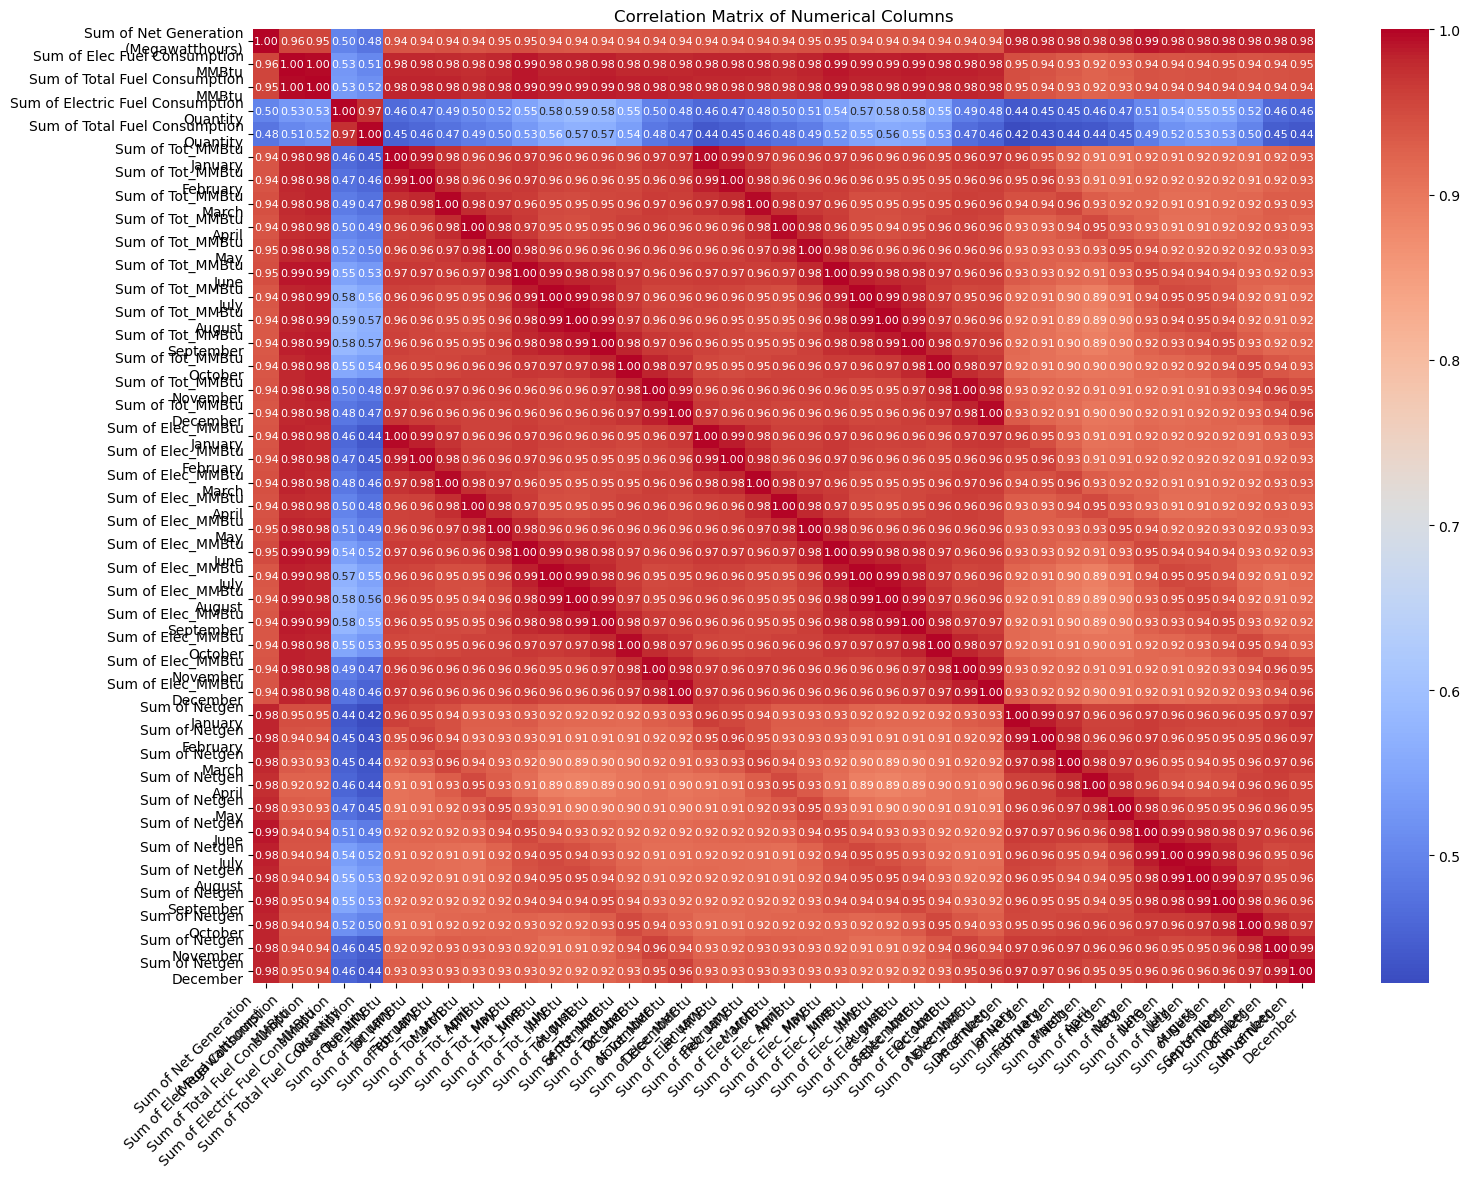

Plot saved to /Users/amyzhang/Desktop/A6_Dashboard/03 Viz/Correl_Matrix_Full.png


In [63]:
# 1. Select numerical columns
numerical_columns = ['Sum of Net Generation\n(Megawatthours)',
       'Sum of Elec Fuel Consumption\nMMBtu',
       'Sum of Total Fuel Consumption\nMMBtu',
       'Sum of Electric Fuel Consumption\nQuantity',
       'Sum of Total Fuel Consumption\nQuantity', 'Sum of Tot_MMBtu\nJanuary',
       'Sum of Tot_MMBtu\nFebruary', 'Sum of Tot_MMBtu\nMarch',
       'Sum of Tot_MMBtu\nApril', 'Sum of Tot_MMBtu\nMay',
       'Sum of Tot_MMBtu\nJune', 'Sum of Tot_MMBtu\nJuly',
       'Sum of Tot_MMBtu\nAugust', 'Sum of Tot_MMBtu\nSeptember',
       'Sum of Tot_MMBtu\nOctober', 'Sum of Tot_MMBtu\nNovember',
       'Sum of Tot_MMBtu\nDecember', 'Sum of Elec_MMBtu\nJanuary',
       'Sum of Elec_MMBtu\nFebruary', 'Sum of Elec_MMBtu\nMarch',
       'Sum of Elec_MMBtu\nApril', 'Sum of Elec_MMBtu\nMay',
       'Sum of Elec_MMBtu\nJune', 'Sum of Elec_MMBtu\nJuly',
       'Sum of Elec_MMBtu\nAugust', 'Sum of Elec_MMBtu\nSeptember',
       'Sum of Elec_MMBtu\nOctober', 'Sum of Elec_MMBtu\nNovember',
       'Sum of Elec_MMBtu\nDecember', 'Sum of Netgen\nJanuary',
       'Sum of Netgen\nFebruary', 'Sum of Netgen\nMarch',
       'Sum of Netgen\nApril', 'Sum of Netgen\nMay', 'Sum of Netgen\nJune',
       'Sum of Netgen\nJuly', 'Sum of Netgen\nAugust',
       'Sum of Netgen\nSeptember', 'Sum of Netgen\nOctober',
       'Sum of Netgen\nNovember', 'Sum of Netgen\nDecember']

# 2. Calculate the correlation matrix
correlation_matrix = agg_table_df[numerical_columns].corr()

# Adjust figure size and heatmap settings
viz1 = plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title with adjusted line spacing
plt.title("Correlation Matrix of Numerical Columns", linespacing=1.5)

# Use tight layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

# Save the plot
path = r'/Users/amyzhang/Desktop/A6_Dashboard/03 Viz'
save_path = os.path.join(path, 'Correl_Matrix_Full.png')
viz1.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")


### Observations

The heatmap reveals recurring darker red patches, indicating clusters of strong positive correlations. A closer examination highlights the following patterns:

1.  **Seasonal Patterns**:
    * A diagonal block of darker red patches appears among monthly metrics, suggesting strong correlations between consecutive months.
    * Larger red patches are observed for summer months, particularly within the fuel consumption-related metrics. This likely reflects increased energy demand for air conditioning during warmer periods.

2.  **Fuel Consumption vs. Net Generation**:
    * `Net Generation` metrics exhibit seasonality but show slightly lighter shading (weaker correlations) compared to cross-sections of `Total Fuel Consumed` and `Total Fuel Consumed for Electricity`.
    * This is expected, as `Total Fuel Consumed` and `Total Fuel Consumed for Electricity` are closely related.

3.  **Total Fuel Consumed and Electricity Fuel Consumption in Quantity (Physical Unit Label)**:
    * These metrics exhibit the "lowest correlation" relative to the rest, likely due to discrepancies between their physical units and the conversions to MMBtu.

4.  **Next Steps**:
    * Given that **Fuel Efficiency** is calculated as `Total Fuel Consumed / Net Generation`, the next step will involve a focused study of these relationships.

## b) Fuel Efficiency metrics - correlation matrix

Plot saved to /Users/amyzhang/Desktop/A6_Dashboard/03 Viz/Correl_Matrix_Fuel_Efficiency.png


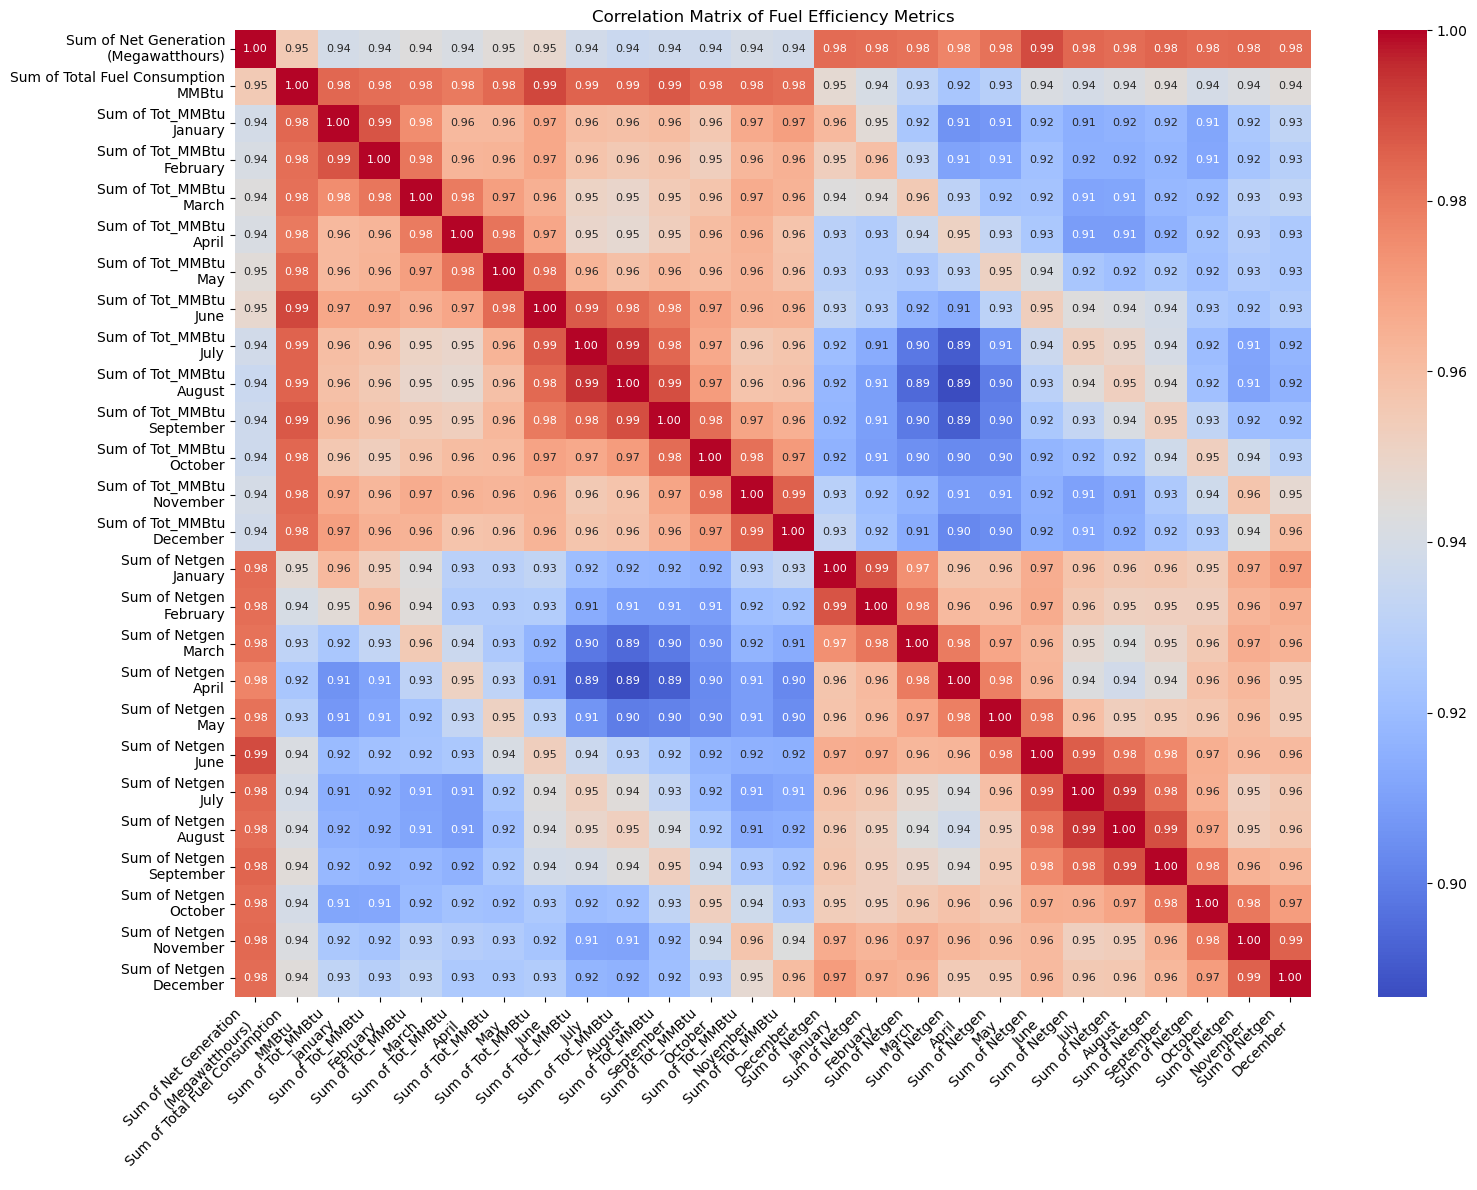

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Select numerical columns
numerical_columns = ['Sum of Net Generation\n(Megawatthours)',
       'Sum of Total Fuel Consumption\nMMBtu',
       'Sum of Tot_MMBtu\nJanuary',
       'Sum of Tot_MMBtu\nFebruary', 'Sum of Tot_MMBtu\nMarch',
       'Sum of Tot_MMBtu\nApril', 'Sum of Tot_MMBtu\nMay',
       'Sum of Tot_MMBtu\nJune', 'Sum of Tot_MMBtu\nJuly',
       'Sum of Tot_MMBtu\nAugust', 'Sum of Tot_MMBtu\nSeptember',
       'Sum of Tot_MMBtu\nOctober', 'Sum of Tot_MMBtu\nNovember',
       'Sum of Tot_MMBtu\nDecember', 
       'Sum of Netgen\nJanuary',
       'Sum of Netgen\nFebruary', 'Sum of Netgen\nMarch',
       'Sum of Netgen\nApril', 'Sum of Netgen\nMay', 'Sum of Netgen\nJune',
       'Sum of Netgen\nJuly', 'Sum of Netgen\nAugust',
       'Sum of Netgen\nSeptember', 'Sum of Netgen\nOctober',
       'Sum of Netgen\nNovember', 'Sum of Netgen\nDecember']

# 2. Calculate the correlation matrix
correlation_matrix = agg_table_df[numerical_columns].corr()

# Adjust figure size and heatmap settings
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title with adjusted line spacing
plt.title("Correlation Matrix of Fuel Efficiency Metrics", linespacing=1.5)

# Use tight layout to prevent overlap
plt.tight_layout()

# Save the plot
path = r'/Users/amyzhang/Desktop/A6_Dashboard/03 Viz'  # Replace with your desired directory
save_path = os.path.join(path, 'Correl_Matrix_Fuel_Efficiency.png')  # Combine path and filename
plt.savefig(save_path, format='png', dpi=300)  # Save the figure with high resolution

# Print confirmation message
print(f"Plot saved to {save_path}")

# Show plot
plt.show()


## Key Observations Confirmed:

*   **Seasonality in Cross-Correlations:** The top-left and bottom-right quadrants, representing cross-correlations between total fuel consumption and net generation, show distinct seasonal patterns. The summer/early fall patches of strong positive correlation confirm the link between peak electricity demand and fuel consumption during these months.

*   **High Correlation Magnitude (across the matrix):** The "blue" patches still represent strong positive correlations (values close to 0.9). The scale ranging from 0.89 to 1 indicates that nearly all metrics are highly positively correlated.

*   **Summer vs. Spring Patterns:** The observation that spring net electricity generation has lower correlation with summer fuel consumption (and vice versa) is critical. This highlights the **inverse relationship** between seasons where electricity demand is driven by different factors (cooling vs. general demand).

## Additional Insights & Interpretations:

*   **Dominant Influence of Total Fuel Consumption:** The total fuel consumption metrics seem to have a significant influence on the overall correlation structure. This suggests that these metrics are the primary drivers of patterns in fuel efficiency and electricity generation.
    *   **Explanation:** The total fuel consumption metrics show the highest correlation values across all the rows and columns in the correlation heatmap. Since the fuel consumption data set highly influences the numbers, fuel consumption highly dictates how the electricity efficiency occurs

*   **January as a Unique Month:** The "Sum of Tot_MMBtu January" exhibits a slightly different pattern than the summer months. This could be due to:
    *   Increased heating demand in certain regions.
    *   Operational patterns that differ from the summer.
    *   Data collection anomalies in January.

## Next Steps:

Refine Metrics: We will now filter the dataframe to carry out the correlation matrix for: (1) top Prime Mover - Fuel Type combination and (2) Renewable Fuel Types.  


### 1) Top Prime Mover - Fuel Type combination

The top Prime Mover - Fuel Type combination is: Steam Turbine - Natural Gas
Plot saved to /Users/amyzhang/Desktop/A6_Dashboard/03 Viz/Correl_Matrix_Top_PrimeMover_FuelType.png


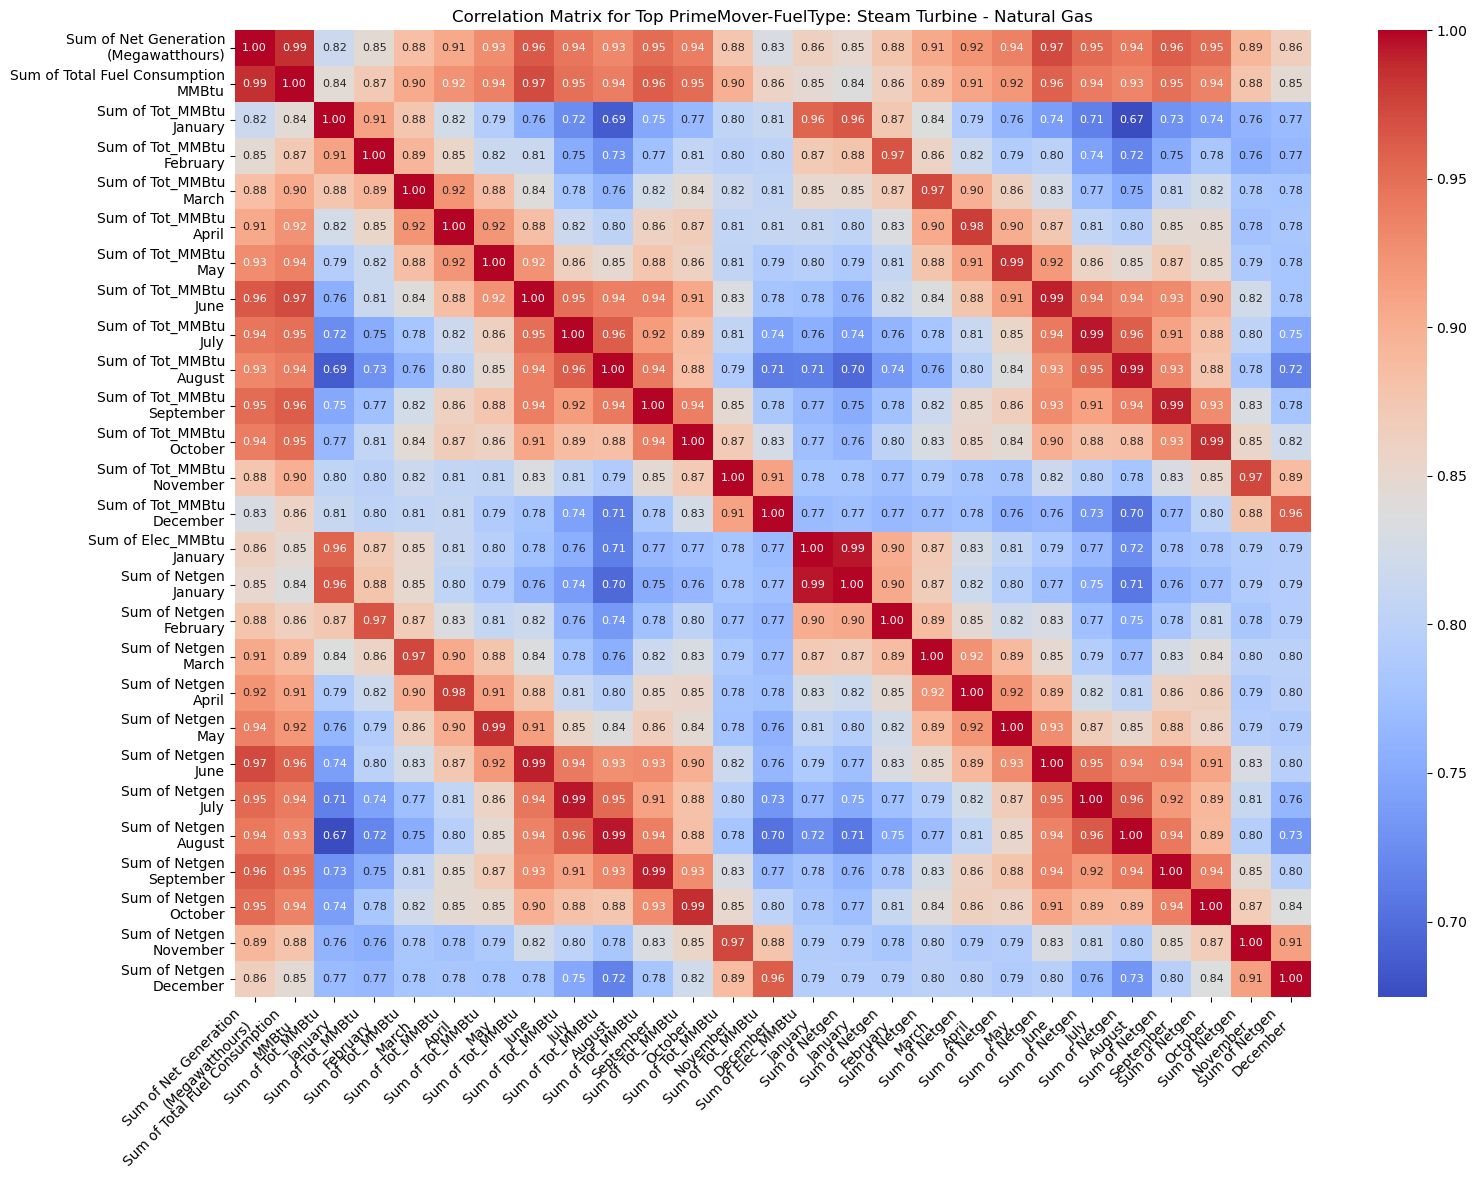

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Combine 'Prime Mover Full Name' and 'Fuel Type Full Name' into a single column for counting
agg_table_df['PrimeMover_FuelType'] = agg_table_df['Prime Mover Full Name'] + ' - ' + agg_table_df['Fuel Type Full Name']

# Step 2: Count the occurrences of each combination
combination_counts = agg_table_df['PrimeMover_FuelType'].value_counts()

# Step 3: Select the top N combinations (e.g., top 1)
top_n = 1
top_combinations = combination_counts.head(top_n).index.tolist()

# Print the top combination
print(f"The top Prime Mover - Fuel Type combination is: {top_combinations[0]}")

# Step 4: Filter the DataFrame for the top combinations
filtered_df = agg_table_df[agg_table_df['PrimeMover_FuelType'].isin(top_combinations)]

# Step 5: Select numerical columns for correlation analysis
numerical_columns = ['Sum of Net Generation\n(Megawatthours)',
       'Sum of Total Fuel Consumption\nMMBtu',
       'Sum of Tot_MMBtu\nJanuary',
       'Sum of Tot_MMBtu\nFebruary', 'Sum of Tot_MMBtu\nMarch',
       'Sum of Tot_MMBtu\nApril', 'Sum of Tot_MMBtu\nMay',
       'Sum of Tot_MMBtu\nJune', 'Sum of Tot_MMBtu\nJuly',
       'Sum of Tot_MMBtu\nAugust', 'Sum of Tot_MMBtu\nSeptember',
       'Sum of Tot_MMBtu\nOctober', 'Sum of Tot_MMBtu\nNovember',
       'Sum of Tot_MMBtu\nDecember', 'Sum of Elec_MMBtu\nJanuary',
       'Sum of Netgen\nJanuary',
       'Sum of Netgen\nFebruary', 'Sum of Netgen\nMarch',
       'Sum of Netgen\nApril', 'Sum of Netgen\nMay', 'Sum of Netgen\nJune',
       'Sum of Netgen\nJuly', 'Sum of Netgen\nAugust',
       'Sum of Netgen\nSeptember', 'Sum of Netgen\nOctober',
       'Sum of Netgen\nNovember', 'Sum of Netgen\nDecember']

# Step 6: Calculate the correlation matrix for the filtered data
correlation_matrix = filtered_df[numerical_columns].corr()

# Step 7: Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Step 8: Customize the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix for Top PrimeMover-FuelType: {}".format(top_combinations[0]), linespacing=1.5)
plt.tight_layout()

# Step 9: Save the plot (before showing it)
path = r'/Users/amyzhang/Desktop/A6_Dashboard/03 Viz'  # Specify your directory
save_path = os.path.join(path, 'Correl_Matrix_Top_PrimeMover_FuelType.png')  # Combine path and filename
plt.savefig(save_path, format='png', dpi=300)  # Save the figure with high resolution
print(f"Plot saved to {save_path}")

# Step 10: Show the plot
plt.show()


### Specific Observations and Interpretations:

- June is notable as a "strong" month that's correlated across all others with fuel consumptin and electricity generation.
- The data reveals some positive intercorrelation between months of Spring and Summer electricity; however, the lower relation between Winter and Summer suggest that this particular Prime Mover-Fuel Type (Steam Turbine - Natural Gas) is less crucial for electricity production during those periods. Given that we have now discovered information about correlation, how exactly are we supposed to measure this relation?

### 2) Renewable Fuel Types - Correlation Matrix

In [103]:
agg_table_df['Fuel Type Full Name'].value_counts()

Fuel Type Full Name
Natural Gas                            8376
Distillate Fuel Oil                    4239
Solar                                  1828
Water                                  1278
Landfill Gas                           1076
Wind                                   1002
Wood/Wood Waste Solids                  929
Bituminous Coal                         783
Subbituminous Coal                      539
Other Biomass Gas                       535
Other Gas                               517
Black Liquor                            459
Residual Fuel Oil                       395
Electricity used for energy storage     371
(blank)                                 321
Biogenic Municipal Solid Waste          321
Non-biogenic Municipal Solid Waste      321
Nuclear                                 277
Tire-derived Fuels                      245
Waste Heat                              244
Refined Coal                            158
Petroleum Coke                          157
Other Biomas

Number of rows in filtered DataFrame: 7865
Plot saved to /Users/amyzhang/Desktop/A6_Dashboard/03 Viz/Correl_Matrix_Renewable_Fuel_Types.png


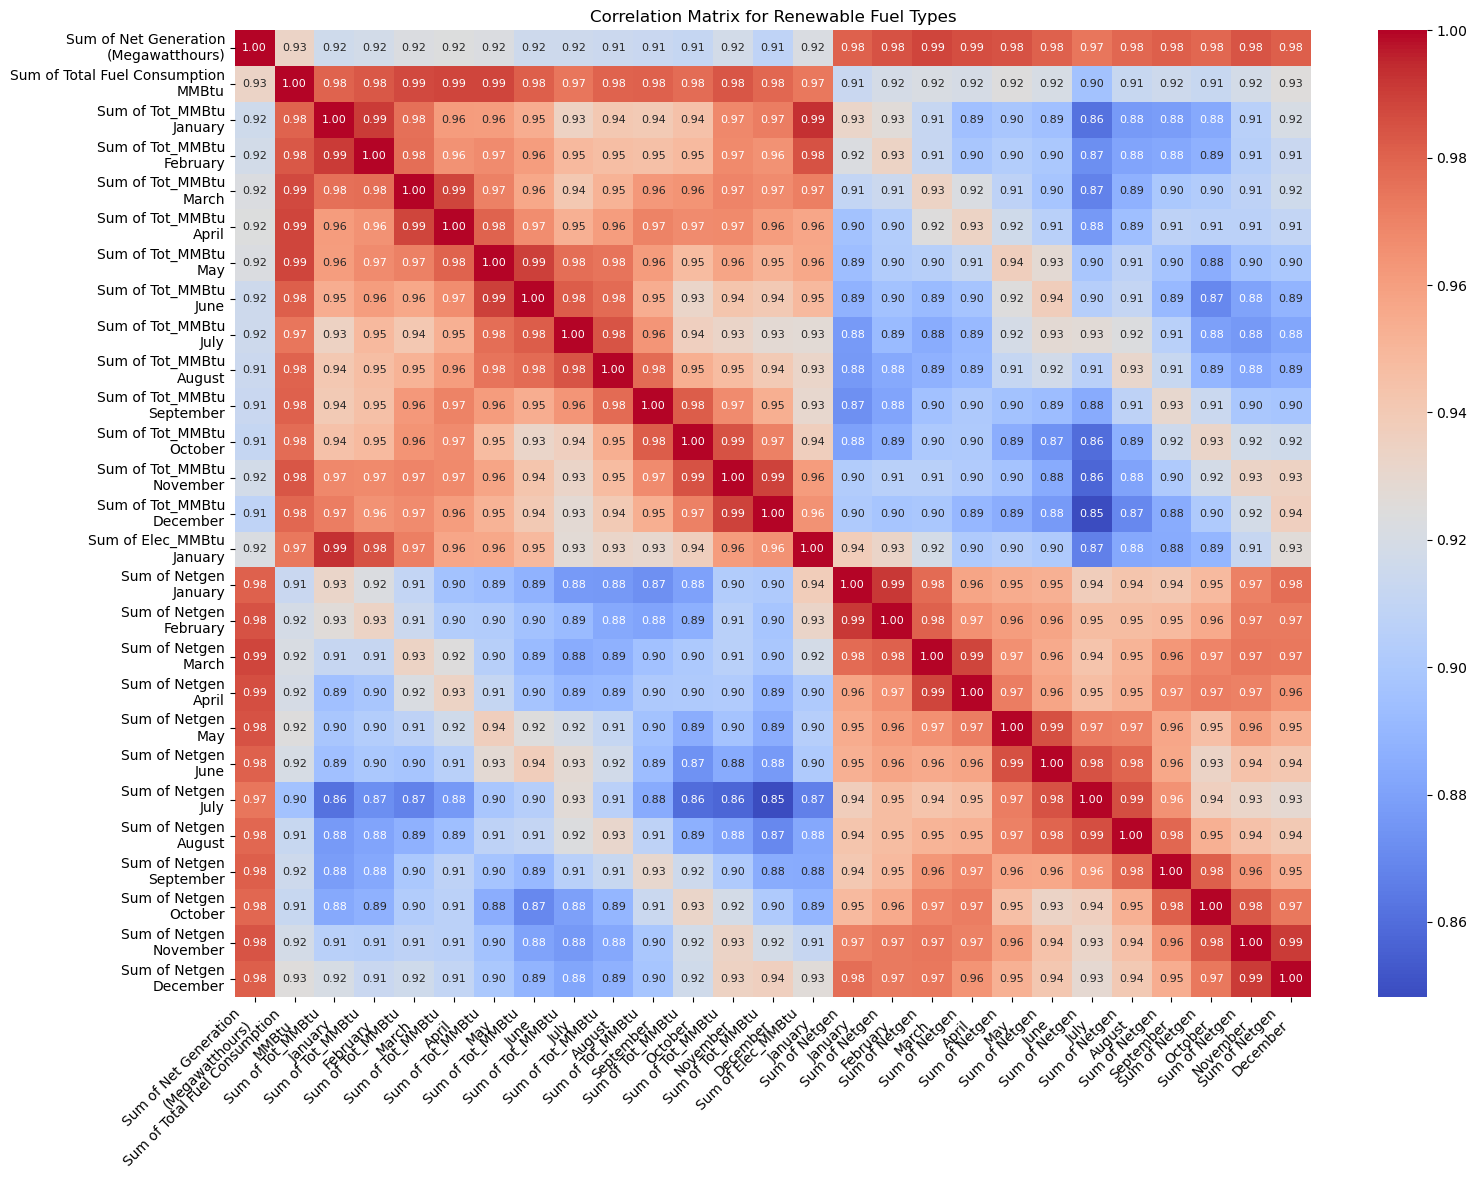

In [106]:
# Define the list of renewable/environmentally friendly fuel types
renewable_fuels = [
    'Solar',
    'Water',
    'Landfill Gas',
    'Wind',
    'Wood/Wood Waste Solids',
    'Other Biomass Gas',
    'Black Liquor',
    'Biogenic Municipal Solid Waste',
    'Other Biomass Solids',
    'Geothermal',
    'Agricultural By-Products',
    'Other Biomass Liquids',
    'Wood Waste Liquids'
]

# Filter the DataFrame for renewable fuel types
filtered_df = agg_table_df[agg_table_df['Fuel Type Full Name'].isin(renewable_fuels)]

# Print the number of rows in the filtered DataFrame to confirm
print(f"Number of rows in filtered DataFrame: {len(filtered_df)}")

# Check if there's enough data to calculate the correlation matrix
if len(filtered_df) < 30:
    print("Insufficient data to compute correlation matrix for renewable fuel types.")
else:
    # Step 5: Select numerical columns for correlation analysis
    numerical_columns = ['Sum of Net Generation\n(Megawatthours)',
           'Sum of Total Fuel Consumption\nMMBtu',
           'Sum of Tot_MMBtu\nJanuary',
           'Sum of Tot_MMBtu\nFebruary', 'Sum of Tot_MMBtu\nMarch',
           'Sum of Tot_MMBtu\nApril', 'Sum of Tot_MMBtu\nMay',
           'Sum of Tot_MMBtu\nJune', 'Sum of Tot_MMBtu\nJuly',
           'Sum of Tot_MMBtu\nAugust', 'Sum of Tot_MMBtu\nSeptember',
           'Sum of Tot_MMBtu\nOctober', 'Sum of Tot_MMBtu\nNovember',
           'Sum of Tot_MMBtu\nDecember', 'Sum of Elec_MMBtu\nJanuary',
           'Sum of Netgen\nJanuary',
           'Sum of Netgen\nFebruary', 'Sum of Netgen\nMarch',
           'Sum of Netgen\nApril', 'Sum of Netgen\nMay', 'Sum of Netgen\nJune',
           'Sum of Netgen\nJuly', 'Sum of Netgen\nAugust',
           'Sum of Netgen\nSeptember', 'Sum of Netgen\nOctober',
           'Sum of Netgen\nNovember', 'Sum of Netgen\nDecember']

    # Step 6: Calculate the correlation matrix for the filtered data
    correlation_matrix = filtered_df[numerical_columns].corr()

    # Step 7: Create the heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

    # Step 8: Customize the plot
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.title("Correlation Matrix for Renewable Fuel Types", linespacing=1.5)
    plt.tight_layout()

    # Step 9: Save the plot (before showing it)
    path = r'/Users/amyzhang/Desktop/A6_Dashboard/03 Viz'  # Specify your directory
    save_path = os.path.join(path, 'Correl_Matrix_Renewable_Fuel_Types.png')  # Combine path and filename
    plt.savefig(save_path, format='png', dpi=300)  # Save the figure with high resolution
    print(f"Plot saved to {save_path}")

    # Step 10: Show the plot
    plt.show()


# Renewable Energy Correlation Matrix
Compared to Steam Turbine - Natural Gas; more balanced across the year vs. summer-intensive seasonality

# Main Takeaway from Category specific Correlation Matrices 👀
(Amy-332; ChatGPT-0101)

## Normalization and Correlation Matrices: Understanding Fuel Efficiency and Prime Movers

In the process of analyzing the EIA power plant dataset with the aim to understand fuel efficiency across different fuel types and prime movers, we encountered the need for normalization and the limitations of correlation matrices.

### Normalization: A Key for Meaningful Comparisons

Normalization is crucial when comparing different plants, fuel types, or even different types of prime movers. While initial analyses often involve correlation matrices to spot relationships between variables, we quickly realized that correlation matrices on their own could only tell us how similar the variables were *within* their own category (e.g., a particular fuel type or prime mover, renewable, non-renewable, etc.), not how efficiently one fuel type or prime mover was performing compared to others.

To better understand fuel efficiency, we normalized certain columns like MMBTU per unit and Elec_MMBtu. Specifically, the ratio of `Sum of Elec_MMBtu` to `Sum of Total Fuel Consumption` or other similar metrics allowed us to separate fuel consumption for electricity generation from other potential energy uses. This distinction was vital, as it helped avoid confounding plant-specific inefficiencies with fuel energy density. Essentially, this gave us a clearer view of how efficiently electricity was being produced relative to the fuel consumed.

### Correlation Matrices: Insights Within a Category

Correlation matrices are helpful for understanding the internal relationships within each category, such as:

*   How certain fuel types behave with respect to each other (e.g., natural gas vs. coal in the same plant over time).
*   How different prime movers interact with specific fuel types.

However, correlation matrices only give us insights about how a fuel type or prime mover is performing *within itself* over time (e.g., comparing MMBTU consumption for natural gas in January vs. December). They are not a tool for comparing the performance of different categories (like comparing gas to coal or steam turbines to gas turbines). This is where normalization comes in to contextualize and compare across the categories in meaningful ways.

## Why Normalize? Which Normalization to Use?

Normalization is crucial when comparing different plants, fuel types, or even different types of prime movers. The goal is to contextualize the raw numbers, adjusting for factors like plant size, fuel type, and technology inefficiencies. But which normalization is the best choice for our analysis? Here are the main options we’ve considered:

### Normalization Options:

*   **MMBTU per unit:** This is essentially the fuel's inherent efficiency—a direct indicator of how well a fuel can be converted into energy. Since it is a characteristic of the fuel itself, it doesn't change much month-to-month. This normalization gives a stable baseline for understanding the inherent efficiency of different fuel types. We can aggregate this on the Year - Prime Mover - Fuel Type level (with or without Plant State, depending on granularity) and find their monthly average, then merge it into the dataset to ensure fuel efficiency is consistently accounted for. This approach works well because it isolates the fuel's performance without getting entangled in the plant-specific factors or operational inefficiencies.

*   **Normalizing Net Gen by Plant Id Count:** This option focuses on plant size—specifically, the number of plants within a specific group. While it doesn’t give us a clear picture of fuel efficiency, it offers insight into how prime mover technologies are performing across different plants. This metric likely captures plant inefficiencies, as it accounts for the number of plants producing Net Generation. However, it might be less relevant when we want to focus directly on fuel efficiency or how well a particular fuel performs in relation to electricity generation.

*   **Normalizing Net Gen by Total MMBTU:** This is similar to the previous option, but it normalizes the Net Generation by the total fuel consumption (MMBTU). This gives us a sense of how much fuel is being used relative to the total energy output across the plant's operations. It doesn’t fully isolate fuel efficiency from other operational inefficiencies, but it’s a good general efficiency measure that accounts for the overall fuel use in the plant. It will be useful, but still doesn’t get at the core fuel-to-energy conversion efficiency as directly as we might need.

*   **Normalizing Net Gen by Elec_MMBTU:** This is the closest to understanding fuel efficiency directly because it normalizes Net Generation by the fuel consumed specifically for electricity generation (i.e., Elec_MMBTU). By using this normalization, we are comparing how efficiently a plant converts fuel into electricity, which is exactly what we're after when it comes to fuel efficiency. This method minimizes the confounding effects of plant inefficiencies and extraneous fuel use that doesn’t contribute to electricity production.

### Combining the Normalizations:

To capture a more nuanced picture, we may decide to use a combination of these normalization methods. Given the complexity of the dataset and the multiple dimensions of efficiency we’re interested in, we might even create a composite index that weights different normalizations.

### TL;DR:

Different normalization methods provide varying insights into the efficiency of electricity generation:

*   `MMBTU_per_unit` focuses on fuel characteristics and is stable month-to-month.

*   Net Gen by Plant Id count and Net Gen by Total MMBTU help understand prime mover performance and general plant efficiency.

*   Net Gen by Elec_MMBTU is the most direct for fuel efficiency because it isolates electricity-specific fuel consumption.


# 4. Scatterplots

### Merge MMBTu_per_unit to agg_table_df

In [136]:
# Path to your excel file
excel_file_path = '/Users/amyzhang/Desktop/A6_Dashboard/01 Data/analysis_ready/MMBTU_per_unit_pivot.xlsx'

# Import
mmbtu_df = pd.read_excel(excel_file_path)  # Corrected line

# Verify the import
print(mmbtu_df.shape)
print(mmbtu_df.columns)


(1118, 17)
Index(['YEAR', 'Reported\nPrime Mover', 'Prime Mover Full Name',
       'Reported\nFuel Type Code', 'Fuel Type Full Name',
       'Average of MMBtuPer_Unit\nDecember',
       'Average of MMBtuPer_Unit\nNovember',
       'Average of MMBtuPer_Unit\nOctober',
       'Average of MMBtuPer_Unit\nSeptember',
       'Average of MMBtuPer_Unit\nAugust', 'Average of MMBtuPer_Unit\nJuly',
       'Average of MMBtuPer_Unit\nJune', 'Average of MMBtuPer_Unit\nMay',
       'Average of MMBtuPer_Unit\nApril', 'Average of MMBtuPer_Unit\nMarch',
       'Average of MMBtuPer_Unit\nFebruary',
       'Average of MMBtuPer_Unit\nJanuary'],
      dtype='object')


In [138]:
agg_table_df.shape

(25497, 57)

In [140]:
# Rename columns in agg_table_df to match mmbtu_df for consistency during merge
agg_table_df = agg_table_df.rename(columns={
    'Reported\nPrime Mover': 'Reported\nPrime Mover',
    'Prime Mover Full Name': 'Prime Mover Full Name',
    'Reported\nFuel Type Code': 'Reported\nFuel Type Code',
    'Fuel Type Full Name': 'Fuel Type Full Name'
})

# Create the merge keys
merge_keys = ['YEAR', 'Reported\nPrime Mover', 'Prime Mover Full Name', 'Reported\nFuel Type Code', 'Fuel Type Full Name']

# Perform the left merge (left join)
merged_df = pd.merge(
    agg_table_df,
    mmbtu_df,
    on=merge_keys,
    how='left'
)

# Verify the merge
print("Shape of agg_table_df:", agg_table_df.shape)
print("Shape of mmbtu_df:", mmbtu_df.shape)
print("Shape of merged_df:", merged_df.shape)
print(merged_df.head())


Shape of agg_table_df: (25497, 57)
Shape of mmbtu_df: (1118, 17)
Shape of merged_df: (25497, 69)
   YEAR Reported\nFuel Type Code Fuel Type Full Name Reported\nPrime Mover  \
0  2015                      SUN               Solar                    CA   
1  2015                      SUN               Solar                    CP   
2  2015                      SUN               Solar                    PV   
3  2015                      SUN               Solar                    PV   
4  2015                      SUN               Solar                    PV   

                      Prime Mover Full Name Plant State NERC Region  \
0              Combined-Cycle -- Steam Part          FL        FRCC   
1  Energy Storage, Concentrated Solar Power          AZ        WECC   
2                              Photovoltaic          AZ        WECC   
3                              Photovoltaic          AZ        WECC   
4                              Photovoltaic          AZ        WECC   

       

In [147]:
merged_df.columns

Index(['YEAR', 'Reported\nFuel Type Code', 'Fuel Type Full Name',
       'Reported\nPrime Mover', 'Prime Mover Full Name', 'Plant State',
       'NERC Region', 'NERC Region Full Name', 'NAICS Code', 'NAICS Full Name',
       'EIA Sector Number', 'Sector Name', 'Physical\nUnit Label',
       'Count of Plant Id', 'Sum of Conflicting Operator Id Flag',
       'Sum of Net Generation\n(Megawatthours)',
       'Sum of Elec Fuel Consumption\nMMBtu',
       'Sum of Total Fuel Consumption\nMMBtu',
       'Sum of Electric Fuel Consumption\nQuantity',
       'Sum of Total Fuel Consumption\nQuantity', 'Sum of Tot_MMBtu\nJanuary',
       'Sum of Tot_MMBtu\nFebruary', 'Sum of Tot_MMBtu\nMarch',
       'Sum of Tot_MMBtu\nApril', 'Sum of Tot_MMBtu\nMay',
       'Sum of Tot_MMBtu\nJune', 'Sum of Tot_MMBtu\nJuly',
       'Sum of Tot_MMBtu\nAugust', 'Sum of Tot_MMBtu\nSeptember',
       'Sum of Tot_MMBtu\nOctober', 'Sum of Tot_MMBtu\nNovember',
       'Sum of Tot_MMBtu\nDecember', 'Sum of Elec_MMBtu\nJan

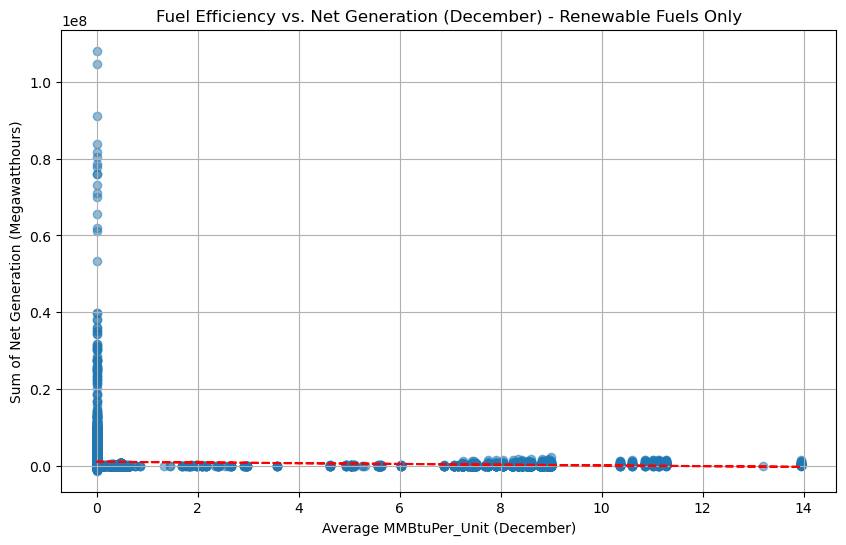

In [151]:
# Define the list of renewable fuel types (same as before)
renewable_fuels = [
    'Solar',
    'Water',
    'Landfill Gas',
    'Wind',
    'Wood/Wood Waste Solids',
    'Other Biomass Gas',
    'Black Liquor',
    'Biogenic Municipal Solid Waste',
    'Other Biomass Solids',
    'Geothermal',
    'Agricultural By-Products',
    'Other Biomass Liquids',
    'Wood Waste Liquids'
]

# Filter the DataFrame for renewable fuel types
renewable_df = merged_df[merged_df['Fuel Type Full Name'].isin(renewable_fuels)]

# Create the scatterplot for renewable fuels
plt.figure(figsize=(10, 6))
plt.scatter(renewable_df['Average of MMBtuPer_Unit\nDecember'], renewable_df['Sum of Net Generation\n(Megawatthours)'], alpha=0.5)
plt.title('Fuel Efficiency vs. Net Generation (December) - Renewable Fuels Only')
plt.xlabel('Average MMBtuPer_Unit (December)')
plt.ylabel('Sum of Net Generation (Megawatthours)')
plt.grid(True)

# Check if the number of points is large enough to add a best fit line.
if len(renewable_df) > 1:
    # Add a line of best fit
    z = np.polyfit(renewable_df['Average of MMBtuPer_Unit\nDecember'], renewable_df['Sum of Net Generation\n(Megawatthours)'], 1)
    p = np.poly1d(z)
    plt.plot(renewable_df['Average of MMBtuPer_Unit\nDecember'],p(renewable_df['Average of MMBtuPer_Unit\nDecember']),"r--")

plt.show()


### Interpretation of Renewable Fuel Scatterplot (Perplexity - Instance 20250331):

This scatterplot presents some key insights into renewable energy sources:

*   **Cluster at Low Fuel Efficiency:** A significant number of data points cluster around a low value for "Average MMBtuPer\_Unit" (close to 0). This makes sense for renewables like solar and wind, where the "fuel" (sunlight, wind) is free, but the conversion process may not be as efficient as burning fossil fuels.
*   **Wide Range of Net Generation:** The Y-axis, "Sum of Net Generation (Megawatthours)", shows a wide range of values, from near 0 all the way up to 100 million MWh. This means that even with lower "fuel efficiency," renewables can still generate significant amounts of electricity.
*   **No Clear Relationship:** The data does not show any strong positive or negative correlation between fuel efficiency (MMBtu per Unit) and net generation.

**Additional Considerations and Next Steps:**

*   **Outliers:** The presence of outliers (points far from the main clusters) can distort the visual interpretation.
*   **Differentiate Renewables:** Not all renewables are the same! Consider creating separate scatterplots for each renewable fuel type, or color-coding the points by fuel type. For example, solar and wind will likely have different patterns than biomass or geothermal.
*   **Consider Capacity Factor:** Fuel efficiency doesn't tell the whole story. A related concept is "capacity factor" -- the ratio of actual energy output to the maximum possible output. Renewable energy sources like solar and wind tend to have lower capacity factors than fossil fuel plants due to their intermittent nature.

In summary, while this scatterplot alone doesn't tell us everything, it highlights the unique characteristics of renewable energy sources: their low "fuel efficiency" (as measured by MMBtu per unit) and their wide range of net generation capabilities. The next step is to dig deeper into the individual fuel types and consider other factors like capacity factor to get a more complete picture.


## 5) Pair Plot

Pair plot saved to: /Users/amyzhang/Desktop/A6_Dashboard/03 Viz/Targeted_Pair_Plot.png


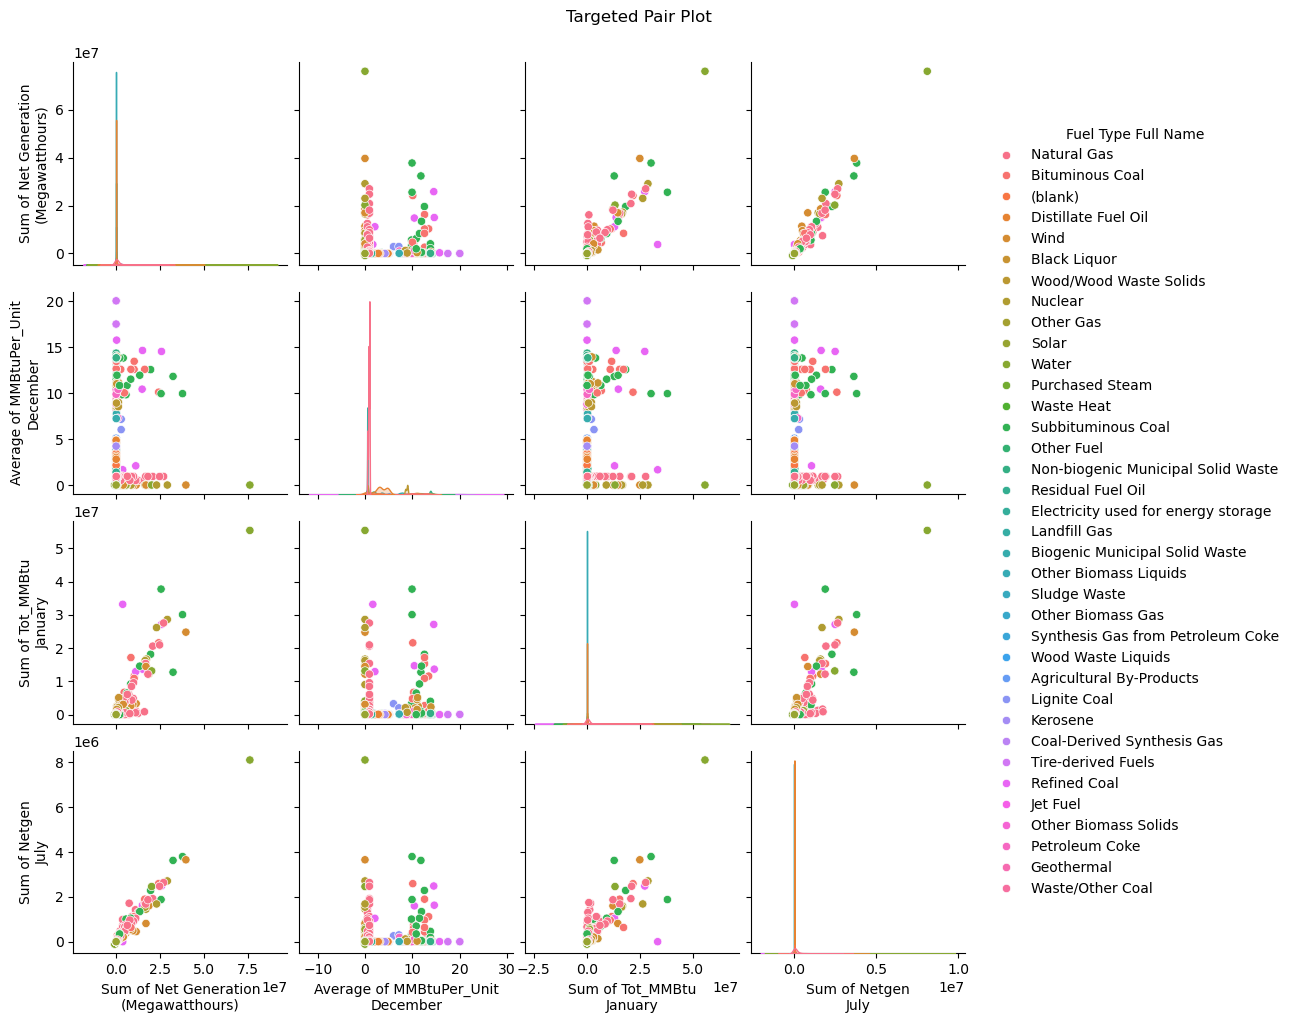

In [165]:
# Selected variables
selected_vars = [
    'Sum of Net Generation\n(Megawatthours)',
    'Average of MMBtuPer_Unit\nDecember',
    'Fuel Type Full Name',
    'Plant State',
    'NAICS Full Name',
    'Sum of Tot_MMBtu\nJanuary',
    'Sum of Netgen\nJuly'
]

# Sampling
sample_size = 1000
pair_plot_data_sample = merged_df[selected_vars].sample(n=min(sample_size, len(merged_df)), random_state=42)

# Create the pair plot
pair_plot = sns.pairplot(pair_plot_data_sample, hue='Fuel Type Full Name')  # Optional: color by fuel type
pair_plot.fig.suptitle('Targeted Pair Plot', y=1.02)

# Save the plot
path = '/Users/amyzhang/Desktop/A6_Dashboard/03 Viz'
save_path = os.path.join(path, 'Targeted_Pair_Plot.png')
pair_plot.savefig(save_path)

print(f"Pair plot saved to: {save_path}")


### Specific Observations (Targeted Pair Plot):

## Amy Zhang (instance 332) version (edited by Perplexity-20250331): 

*   For the first column--Total Net Generation of Electricity--there appears to be a strong positive correlation between Electricity Generation in July; a positive correlation with Total fuels consumed in January, but with more deviations from the inferred trend line. Fuel efficiency in December does not have a clear pattern of clustering to claim a relationship with Total Electricity Generation. This suggests that seasonal electricity consumption patterns may be more important than fuel efficiency for some producers.
*   For fuel efficiency in December (2nd column), none of the other variables have a clear relationship patterns. Fuel efficiency is perhaps not the biggest predictor for other outcomes. 
*   Total fuels consumed in January appears to have a positive relationship with Electricity generation in July (which is curious), and a strong positive correlation with the Total Net Generation of Electricity. Perhaps plants are stocking up on more fuel in advance to cover the consumption.

However, this method is limited due to hard-to-differentiate fuel data, and it being hard to see strong results given this method.

## Gemini AI (instance 20250331) version: 
*   **Sum of Net Generation (July) vs. Sum of Net Generation (January):**
    *   A strong positive correlation is visible. This suggests that power plants that generate a lot in January also tend to generate a lot in July.
    *   The spread of data points indicates that while there's a trend, there's also variability in generation between these two months.

*   **Sum of Net Generation (July) vs. Sum of Tot MMBtu (January):**
    *   Again, a positive correlation is apparent, indicating that higher fuel consumption in January often corresponds to higher generation in July.

*   **Sum of Tot MMBtu (January) vs. Average of MMBtu Per Unit (December):**
    *   There's a less obvious correlation here. The relationship seems more scattered. This suggests that the total fuel consumption in January might not be strongly tied to the average fuel efficiency in December.

*   **Average of MMBtu Per Unit (December) vs. Sum of Net Generation (January):**
    *   There seems to be little to no correlation.

*   **Fuel Type Differentiation:**
    *   Different fuel types occupy distinct regions of the plots. For example, "Natural Gas" often shows up in areas of higher generation. This indicates that fuel type is a significant factor in explaining the variation in these variables.
    *   Some fuel types are clustered tightly, while others are more spread out, suggesting differing levels of consistency in fuel consumption and generation.

*   **Histograms:**
    *   The histograms on the diagonal reveal the distribution of each variable. For instance, "Sum of Net Generation (July)" and "Sum of Net Generation (January)" appear to be skewed, with many data points clustered at lower values and a long tail extending to higher values.
    *   "Average of MMBtu Per Unit (December)" has a very narrow distribution.

### Potential Insights and Further Questions:

*   **Seasonality:** The strong correlation between January and July generation highlights the importance of seasonality in power generation.
*   **Fuel Efficiency:** The "Average of MMBtu Per Unit" is a measure of fuel efficiency. The plot suggests that fuel efficiency might not be a strong predictor of total fuel consumption or generation.
*   **Fuel Type Impact:** The distinct patterns for different fuel types suggest that fuel type is a critical factor in understanding fuel consumption and generation patterns.
*   **Outliers:** Some data points appear to be outliers, which might warrant further investigation.
*   **Units:** It's important to keep track of the units of each variable (MegawattHours and MMBtu) to properly interpret the relationships.

In summary, this targeted pair plot provides a valuable overview of the relationships between fuel consumption, generation, and fuel type. It highlights strong seasonal patterns and the significant role of fuel type in explaining variations in these variables.


Categorical plot saved to: /Users/amyzhang/Desktop/A6_Dashboard/03 Viz/Net_Generation_by_Fuel_Type.png


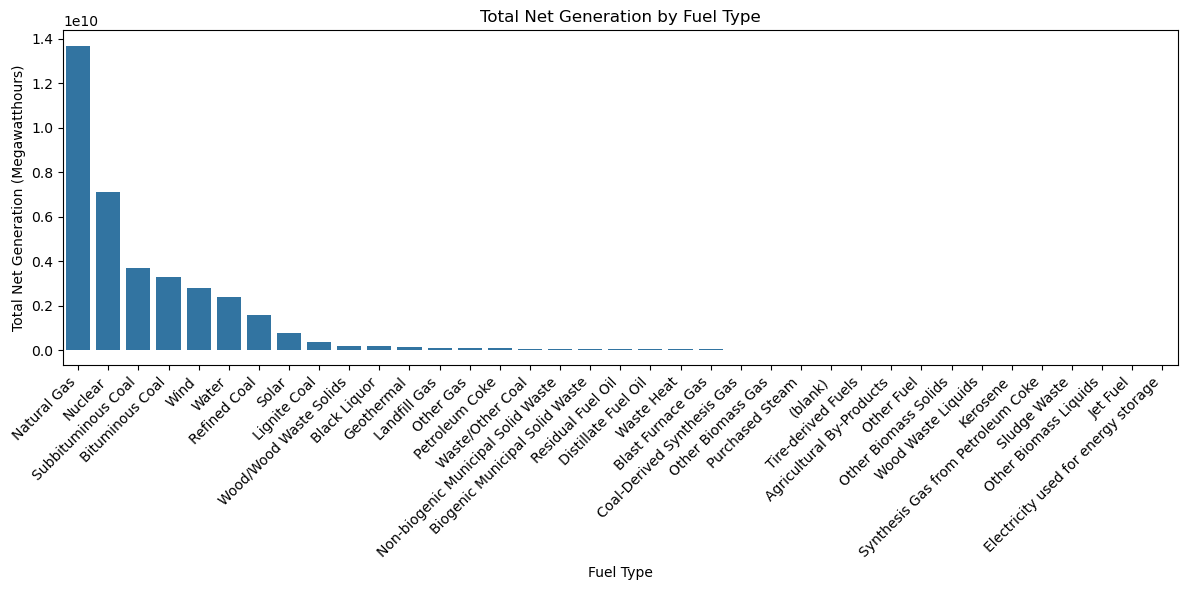

In [180]:
# Group by 'Fuel Type Full Name' and sum the 'Sum of Net Generation'
net_gen_by_fuel = merged_df.groupby('Fuel Type Full Name')['Sum of Net Generation\n(Megawatthours)'].sum().reset_index()

# Sort for better visualization (optional)
net_gen_by_fuel = net_gen_by_fuel.sort_values(by='Sum of Net Generation\n(Megawatthours)', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Fuel Type Full Name', y='Sum of Net Generation\n(Megawatthours)', data=net_gen_by_fuel)
plt.xticks(rotation=45, ha='right')
plt.title('Total Net Generation by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Total Net Generation (Megawatthours)')
plt.tight_layout()

# Save the plot
path = '/Users/amyzhang/Desktop/A6_Dashboard/03 Viz'  # Specify your directory
save_path = os.path.join(path, 'Net_Generation_by_Fuel_Type.png')  # Combine path and filename
plt.savefig(save_path)  # Save the figure

print(f"Categorical plot saved to: {save_path}")  # Confirmation message

plt.show()


## Observations

The top fuel types for electricity generation are fossil fuels + nuclean; wind, water, solar, and wood/waste solids are renewables that make the top 10.  

# 8) Reframed Research Questions and Hypotheses: 
Amy Zhang (332); Perplexity (20250331)

**1. Fuel Efficiency, Fuel Type, and Prime Mover**

*   **Original Question:** Are some fuels more energy efficient depending on the prime mover?
*   **Hypothesis (Reframed):** For a given fuel type, there is a statistically significant difference in average fuel efficiency (MMBtu per Unit) depending on the prime mover used.
*   **Investigation Approach:**
    1.  **Data Filtering:** Filter `merged_df` to focus on one fuel type at a time (e.g., "Natural Gas").
    2.  **Group By:** Group the filtered data by `'Prime Mover Full Name'` and calculate the average `'Average of MMBtuPer_Unit\nDecember'` (or another representative month) for each prime mover.
    3.  **Statistical Test:** Perform a one-way ANOVA to compare the means of the fuel efficiency across different prime movers.
        *   *Null Hypothesis (H0):* There is no statistically significant difference in average fuel efficiency across different prime movers for the selected fuel type.
        *   *Alternative Hypothesis (Ha):* There is a statistically significant difference in average fuel efficiency across different prime movers for the selected fuel type.
    4.  **Repeat:** Repeat steps 1-3 for other fuel types of interest.

**2. State-Level Energy Efficiency and Technology/Fuel Mix**

*   **Original Question:** Are some states more energy efficient (and if so, what are their predominant technologies and fuel types)?
*   **Hypothesis (Reframed):** There is a statistically significant difference in overall energy efficiency (as measured by the ratio of net generation to total fuel consumption) between different states. States with higher energy efficiency tend to rely more on specific technologies (prime movers) and fuel types.
*   **Investigation Approach:**
    1.  **Calculate State-Level Efficiency:**
        *   Group the data by `'Plant State'`.
        *   Calculate the total net generation and total fuel consumption for each state.
        *   Calculate an "energy efficiency ratio" for each state: `Total Net Generation / Total Fuel Consumption`.  You might need to convert both to the same units (e.g., MMBtu) for this to be meaningful.
    2.  **Analyze Technology/Fuel Mix:**
        *   For each state, calculate the percentage of total net generation that comes from each prime mover and each fuel type.  This will give you the "technology mix" and "fuel mix" for each state.
    3.  **Correlate Efficiency with Mix:**
        *   Calculate the correlation between the state-level energy efficiency ratio and the percentage of generation from each prime mover and fuel type.
        *   Look for significant positive or negative correlations.
    4.  **Statistical Test:** Depending on the data and specific questions:
        *   Correlation analysis to test the strength and significance of the relationships between efficiency and technology/fuel mix.
        *   Regression analysis to build a model to predict energy efficiency based on technology and fuel mix.


In [184]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/01 Data/analysis_ready'
output_file = 'agg_df_MMBTu.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
merged_df.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")

Saving confirmed: 'agg_df_MMBTu.csv' has been created successfully.
